In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_airlines=pd.read_csv("data/airlines.csv")
df_airplanes=pd.read_csv("data/airplanes.csv")
df_airports=pd.read_csv("data/airports.csv")
df_routes=pd.read_csv("data/routes.csv")
df_countries=pd.read_csv("data/countries.csv",header=0,names=['name','iso_cd','dafif_cd'])

#### Create a DataFrame for European countries excluding Vatican City

In [3]:
df_europe = pd.DataFrame({"country": ["Albania","Andorra","Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
                    "Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Georgia","Germany",
                    "Greece","Hungary","Iceland","Ireland","Italy","Kazakhstan","Kosovo","Latvia","Liechtenstein",
                    "Lithuania","Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","Macedonia",
                    "Norway","Poland","Portugal","Romania","Russia","San Marino","Serbia","Slovakia","Slovenia","Spain",
                    "Sweden","Switzerland","Turkey","Ukraine","United Kingdom"]})


### Data Integrity Check

#### Countries from europe DataFrame that are not in countries DF. 
##### Fixed two, others can be ignored

In [4]:
df_europe[~df_europe['country'].isin(df_countries['name'])]

,country
1,Andorra
11,Czechia
24,Kosovo
26,Liechtenstein
40,San Marino


##### List of countries that are in airlines DF, but not in countries DF.
##### Fix data if necessary

In [5]:
df_airlines['Country'][~df_airlines['Country'].isin(df_countries['name'])].unique()

array(['\\N', nan, 'Republic of Korea', 'Ivory Coast',
       'Democratic Republic of the Congo', 'AEROCENTER',
       'Somali Republic', 'Canadian Territories', 'AEROCESAR',
       'AIRPORT HELICOPTER', 'Swaziland', 'Kyrgyzstan', 'ALNACIONAL',
       'ANTARES', 'AVINOR', 'ALCON', 'ASTORIA', 'COMPANY AS', 'AIRPAC',
       'AIRFLIGHT', 'ASA PESADA', 'AIR PRINT', 'APPALACHIAN',
       'ALASKA PACIFIC', 'AEROPERLAS', 'AEROPUMA', 'ATCO', 'AVIOQUINTANA',
       ' S.A.', 'ARMSTRONG', 'AIREX', 'ALASKA', 'SCHEFF', 'AEROSUN',
       'ALL STAR', 'AIR CLASS', 'ATLANTIS CANADA', 'AUDI AIR',
       'AURORA AIR', 'AUSA', 'AVIANCA', 'ALAMO', 'AVEMEX', 'AQUILINE',
       'ACTIVE AERO', 'AEROVARADERO', 'AIRNAT', 'AIRWAVE', 'AEROWEE',
       'AIR FREIGHTER', 'RENTAXEL', 'AIRMAN', 'ATLANTIC NICARAGUA',
       'AZIMUT', 'ARIZAIR', 'Russian Federation', 'Air S',
       'Faroe Islands', "Democratic People's Republic of Korea",
       'Republic of the Congo', 'S', 'Syrian Arab Republic', 'AIR-MAUR',
       '

## Checking for null values

###### Replace null values with 0 or spaces in relevant columns.

In [6]:
airlines_values = {'Airline ID': 0, 'Name': "", 'Country': "", 'Active': ""}
df_airlines.fillna(value=airlines_values,inplace=True)

In [7]:
df_airlines[df_airlines['Country'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Airline ID  0 non-null      int64 
 1   Name        0 non-null      object
 2   Alias       0 non-null      object
 3   IATA        0 non-null      object
 4   ICAO        0 non-null      object
 5   Callsign    0 non-null      object
 6   Country     0 non-null      object
 7   Active      0 non-null      object
dtypes: int64(1), object(7)
memory usage: 0.0+ bytes


In [8]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Airline ID  6162 non-null   int64 
 1   Name        6162 non-null   object
 2   Alias       5656 non-null   object
 3   IATA        1535 non-null   object
 4   ICAO        6075 non-null   object
 5   Callsign    5354 non-null   object
 6   Country     6162 non-null   object
 7   Active      6162 non-null   object
dtypes: int64(1), object(7)
memory usage: 385.2+ KB


In [9]:
df_airplanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       246 non-null    object
 1   IATA code  246 non-null    object
 2   ICAO code  246 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [10]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airport ID             7698 non-null   int64  
 1   Name                   7698 non-null   object 
 2   City                   7649 non-null   object 
 3   Country                7698 non-null   object 
 4   IATA                   7698 non-null   object 
 5   ICAO                   7698 non-null   object 
 6   Latitude               7698 non-null   float64
 7   Longitude              7698 non-null   float64
 8   Altitude               7698 non-null   int64  
 9   Timezone               7698 non-null   object 
 10  DST                    7698 non-null   object 
 11  Tz database time zone  7698 non-null   object 
 12  Type                   7698 non-null   object 
 13  Source                 7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+

In [11]:
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67663 non-null  object
 1   Airline ID              67663 non-null  object
 2   Source airport          67663 non-null  object
 3   Source airport ID       67663 non-null  object
 4   Destination airport     67663 non-null  object
 5   Destination airport ID  67663 non-null  object
 6   Codeshare               14597 non-null  object
 7   Stops                   67663 non-null  int64 
 8   Equipment               67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [12]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      260 non-null    object
 1   iso_cd    259 non-null    object
 2   dafif_cd  260 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


### Join Data Frames

In [13]:
temp1 = pd.merge(df_routes,df_airports,how = 'left', left_on = 'Source airport', right_on = 'IATA')

In [14]:
temp2 = temp1[['Airline', 'Airline ID','Source airport','Source airport ID',      
 'Destination airport',     
 'Destination airport ID',  
 'Codeshare',               
 'Stops',                  
 'Equipment',               
 'Airport ID',            
 'Name',                   
 'City',                   
 'Country']]            

In [15]:
temp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67663 entries, 0 to 67662
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 67663 non-null  object 
 1   Airline ID              67663 non-null  object 
 2   Source airport          67663 non-null  object 
 3   Source airport ID       67663 non-null  object 
 4   Destination airport     67663 non-null  object 
 5   Destination airport ID  67663 non-null  object 
 6   Codeshare               14597 non-null  object 
 7   Stops                   67663 non-null  int64  
 8   Equipment               67645 non-null  object 
 9   Airport ID              67257 non-null  float64
 10  Name                    67257 non-null  object 
 11  City                    67255 non-null  object 
 12  Country                 67257 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 7.2+ MB


In [16]:
temp2.rename(columns={"Airport ID": "Source Airport ID", "Name": "Source Name","City":"Source City","Country":"Source Country"},inplace=True)

C:\Users\DESMOND\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
temp3 = pd.merge(temp2,df_airports,how = 'left', left_on = 'Destination airport', right_on = 'IATA')

In [18]:
temp3.rename(columns={"Airport ID": "Destination Airport ID", "Name": "Destination Name","City":"Destination City","Country":"Destination Country"},inplace=True)

In [19]:
temp3_1= pd.merge(temp3,df_airplanes,how = 'left', left_on = 'Equipment', right_on = 'IATA code')

In [20]:
temp3_1.rename(columns={"Name": "Equipment Name", "IATA code": "Equipment IATA code","ICAO code": "Equipment ICAO code"},inplace=True)

In [21]:
temp3_1.info()          

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67759 entries, 0 to 67758
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 67759 non-null  object 
 1   Airline ID              67759 non-null  object 
 2   Source airport          67759 non-null  object 
 3   Source airport ID       67759 non-null  object 
 4   Destination airport     67759 non-null  object 
 5   Destination airport ID  67759 non-null  object 
 6   Codeshare               14631 non-null  object 
 7   Stops                   67759 non-null  int64  
 8   Equipment               67741 non-null  object 
 9   Source Airport ID       67347 non-null  float64
 10  Source Name             67347 non-null  object 
 11  Source City             67345 non-null  object 
 12  Source Country          67347 non-null  object 
 13  Destination Airport ID  67337 non-null  float64
 14  Destination Name        67337 non-null

In [22]:
temp4 = temp3_1[['Airline', 'Airline ID','Source airport','Source airport ID', 'Source Name',                   
 'Source City',                   
 'Source Country',     
 'Destination airport',     
 'Destination airport ID',  
  'Destination Name',                   
 'Destination City',                   
 'Destination Country',           
 'Equipment', 'Equipment Name']]  

In [23]:
Busy_Airports = temp4[['Source Country']].groupby(['Source Country']).size().nlargest(10).reset_index(name='Frequency')

In [24]:
Busy_Airports # only takeoffs

,Source Country,Frequency
0,United States,13109
1,China,8160
2,United Kingdom,2666
3,Spain,2531
4,Germany,2367
5,France,1930
6,Canada,1852
7,Russia,1843
8,Italy,1776
9,India,1507


In [25]:
temp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67759 entries, 0 to 67758
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67759 non-null  object
 1   Airline ID              67759 non-null  object
 2   Source airport          67759 non-null  object
 3   Source airport ID       67759 non-null  object
 4   Source Name             67347 non-null  object
 5   Source City             67345 non-null  object
 6   Source Country          67347 non-null  object
 7   Destination airport     67759 non-null  object
 8   Destination airport ID  67759 non-null  object
 9   Destination Name        67337 non-null  object
 10  Destination City        67335 non-null  object
 11  Destination Country     67337 non-null  object
 12  Equipment               67741 non-null  object
 13  Equipment Name          42578 non-null  object
dtypes: object(14)
memory usage: 7.8+ MB


In [26]:
country_values = {'Source Country': "", 'Destination Country': "", 'Source City': "", 'Destination City': ""}
temp4.fillna(value=country_values,inplace=True)

C:\Users\DESMOND\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
equipment_values = {'Equipment Name': ""}
temp4.fillna(value=equipment_values,inplace=True)

In [28]:
temp4.loc[temp4['Destination Country'].isin(df_europe['country']) , 'Destination Entity'] = 'Europe'

C:\Users\DESMOND\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\DESMOND\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
temp4.loc[temp4['Source Country'].isin(df_europe['country']) , 'Source Entity'] = 'Europe' 

In [30]:
temp4.loc[temp4['Source Country'] == 'United States' , 'Source Entity'] = 'US' 

In [31]:
temp4.loc[temp4['Destination Country'] == 'United States' , 'Destination Entity'] = 'US' 

In [32]:
temp4.loc[temp4['Source Country'] == 'China' , 'Source Entity'] = 'China' 

In [33]:
temp4.loc[temp4['Destination Country'] == 'China' , 'Destination Entity'] = 'China' 

In [34]:
entity_values = {'Source Entity': "",'Destination Entity': ""}
temp4.fillna(value=entity_values,inplace=True)

In [35]:
temp4.loc[temp4['Equipment Name'].str.contains('Airbus') , 'Equipment Type'] = 'Airbus' 

In [36]:
temp4.loc[temp4['Equipment Name'].str.contains('Boeing') , 'Equipment Type'] = 'Boeing' 

In [37]:
temp4['Equipment Type'][temp4['Equipment Type'].isin(['Boeing','Airbus'])]

103      Airbus
105      Airbus
106      Airbus
107      Airbus
110      Airbus
          ...  
67605    Airbus
67755    Boeing
67756    Boeing
67757    Boeing
67758    Boeing
Name: Equipment Type, Length: 32405, dtype: object

In [38]:
equipment_values = {'Equipment Type': "Other"}
temp4.fillna(value=equipment_values,inplace=True)

In [39]:
temp4.loc[temp4['Source Entity'] == temp4['Destination Entity'] , 'Travel Type'] = 'Domestic' 

In [40]:
temp4.loc[temp4['Source Entity'] != temp4['Destination Entity'] , 'Travel Type'] = 'International' 

In [41]:
df_final=temp4[temp4['Source Entity'].isin(['US','Europe','China'])|temp4['Destination Entity'].isin(['US','Europe','China'])]

In [42]:
df_final

,Airline,Airline ID,Source airport,Source airport ID,Source Name,Source City,Source Country,Destination airport,Destination airport ID,Destination Name,Destination City,Destination Country,Equipment,Equipment Name,Destination Entity,Source Entity,Equipment Type,Travel Type
0,2B,410,AER,2965,Sochi International Airport,Sochi,Russia,KZN,2990,Kazan International Airport,Kazan,Russia,CR2,Canadair Regional Jet 200,Europe,Europe,Other,Domestic
1,2B,410,ASF,2966,Astrakhan Airport,Astrakhan,Russia,KZN,2990,Kazan International Airport,Kazan,Russia,CR2,Canadair Regional Jet 200,Europe,Europe,Other,Domestic
2,2B,410,ASF,2966,Astrakhan Airport,Astrakhan,Russia,MRV,2962,Mineralnyye Vody Airport,Mineralnye Vody,Russia,CR2,Canadair Regional Jet 200,Europe,Europe,Other,Domestic
3,2B,410,CEK,2968,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,KZN,2990,Kazan International Airport,Kazan,Russia,CR2,Canadair Regional Jet 200,Europe,Europe,Other,Domestic
4,2B,410,CEK,2968,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,OVB,4078,Tolmachevo Airport,Novosibirsk,Russia,CR2,Canadair Regional Jet 200,Europe,Europe,Other,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67664,ZK,2607,SVC,6135,NaN,,,PHX,3462,Phoenix Sky Harbor International Airport,Phoenix,United States,BE1,,US,,Other,International
67665,ZK,2607,VIS,7121,Visalia Municipal Airport,Visalia,United States,LAX,3484,Los Angeles International Airport,Los Angeles,United States,BE1,,US,US,Other,Domestic
67666,ZK,2607,WRL,5777,Worland Municipal Airport,Worland,United States,CYS,3804,Cheyenne Regional Jerry Olson Field,Cheyenne,United States,BEH BE1,,US,US,Other,Domestic
67755,ZM,19016,DME,4029,Domodedovo International Airport,Moscow,Russia,FRU,2912,Manas International Airport,Bishkek,Kyrgyzstan,734,Boeing 737-400,,Europe,Boeing,International


In [43]:
df_final[['Equipment Name']].groupby(['Equipment Name']).size().nlargest(20).reset_index(name='Equipment')

,Equipment Name,Equipment
0,,18983
1,Airbus A320,6240
2,Boeing 737-800,6130
3,Airbus A319,2797
4,Boeing 737,1628
5,Airbus A321,823
6,Embraer 190,713
7,De Havilland Canada DHC-8-400 Dash 8Q,678
8,Airbus A330-300,513
9,Boeing 767-300,490


In [44]:
#df=df_final[ (df_final['Equipment Name'].isnull()) | (df_final['Equipment Name']==u'') ]

In [45]:
df_final[df_final['Equipment Name'].str.contains('Boeing')]

,Airline,Airline ID,Source airport,Source airport ID,Source Name,Source City,Source Country,Destination airport,Destination airport ID,Destination Name,Destination City,Destination Country,Equipment,Equipment Name,Destination Entity,Source Entity,Equipment Type,Travel Type
562,3R,3545,BHK,2980,Bukhara Airport,Bukhara,Uzbekistan,DME,4029,Domodedovo International Airport,Moscow,Russia,734,Boeing 737-400,Europe,,Boeing,International
564,3R,3545,DME,4029,Domodedovo International Airport,Moscow,Russia,BHK,2980,Bukhara Airport,Bukhara,Uzbekistan,734,Boeing 737-400,,Europe,Boeing,International
566,3R,3545,DME,4029,Domodedovo International Airport,Moscow,Russia,FEG,6149,Fergana International Airport,Fergana,Uzbekistan,734,Boeing 737-400,,Europe,Boeing,International
567,3R,3545,DME,4029,Domodedovo International Airport,Moscow,Russia,KSQ,6153,Karshi Khanabad Airport,Khanabad,Uzbekistan,734,Boeing 737-400,,Europe,Boeing,International
568,3R,3545,DME,4029,Domodedovo International Airport,Moscow,Russia,NMA,6150,Namangan Airport,Namangan,Uzbekistan,734,Boeing 737-400,,Europe,Boeing,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67530,ZH,4611,ZUH,6355,Zhuhai Jinwan Airport,Zhuhai,China,HYN,6384,Huangyan Luqiao Airport,Huangyan,China,738,Boeing 737-800,China,China,Boeing,Domestic
67531,ZH,4611,ZUH,6355,Zhuhai Jinwan Airport,Zhuhai,China,NNG,3373,Nanning Wuxu Airport,Nanning,China,738,Boeing 737-800,China,China,Boeing,Domestic
67533,ZH,4611,ZYI,9846,Zunyi Xinzhou Airport,Zunyi,China,PEK,3364,Beijing Capital International Airport,Beijing,China,737,Boeing 737,China,China,Boeing,Domestic
67755,ZM,19016,DME,4029,Domodedovo International Airport,Moscow,Russia,FRU,2912,Manas International Airport,Bishkek,Kyrgyzstan,734,Boeing 737-400,,Europe,Boeing,International


## Fun Facts

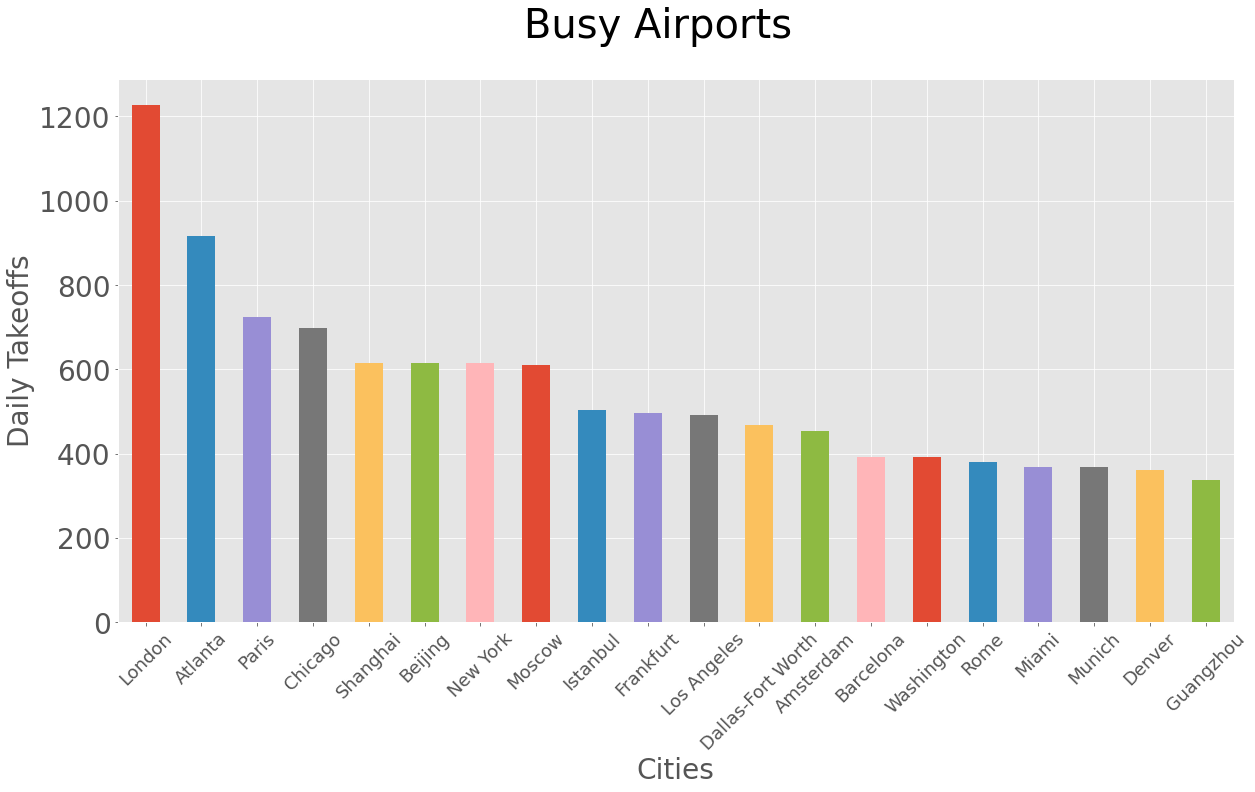

In [46]:
plt.style.use('ggplot')
Busy_Cities = df_final[['Source City']].groupby(['Source City']).size().nlargest(20)
fig, ax = plt.subplots(figsize=(20,10))

Busy_Cities.plot(kind='bar',color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19'])

plt.xlabel('Cities',fontsize=28)
plt.ylabel('Daily Takeoffs',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('Busy Airports',fontsize=40)
plt.show()

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48449 entries, 0 to 67756
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 48449 non-null  object
 1   Airline ID              48449 non-null  object
 2   Source airport          48449 non-null  object
 3   Source airport ID       48449 non-null  object
 4   Source Name             48258 non-null  object
 5   Source City             48449 non-null  object
 6   Source Country          48449 non-null  object
 7   Destination airport     48449 non-null  object
 8   Destination airport ID  48449 non-null  object
 9   Destination Name        48254 non-null  object
 10  Destination City        48449 non-null  object
 11  Destination Country     48449 non-null  object
 12  Equipment               48432 non-null  object
 13  Equipment Name          48449 non-null  object
 14  Destination Entity      48449 non-null  object
 15  So

In [48]:
Routes = temp4[['Source City','Destination City']].groupby(['Source City','Destination City']).size().nlargest(11).reset_index(name='Frequency')

In [49]:
Routes[Routes['Source City'] !=u'']

,Source City,Destination City,Frequency
1,Chicago,Atlanta,25
2,Atlanta,Chicago,24
3,Atlanta,New York,18
4,London,Palma de Mallorca,17
5,Phuket,Bangkok,17
6,Seoul,Tokyo,17
7,Shanghai,Taipei,17
8,Taipei,Shanghai,17
9,Tokyo,Seoul,17
10,Atlanta,Washington,16


In [50]:
df_airports[df_airports['Altitude']==df_airports['Altitude'].max()]

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
6542,9310,Daocheng Yading Airport,Daocheng,China,DCY,ZUDC,29.323056,100.053333,14472,8,N,Asia/Shanghai,airport,OurAirports


In [51]:
df_airports[df_airports['Altitude']==df_airports['Altitude'].min()]

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
1558,1600,Bar Yehuda Airfield,Metzada,Israel,MTZ,LLMZ,31.328199,35.388599,-1266,2,E,Asia/Jerusalem,airport,OurAirports


In [52]:
equipment=df_final[['Equipment Name']].groupby(['Equipment Name']).size().nlargest(10).reset_index()

In [53]:
equipment_list = equipment[equipment['Equipment Name'] !=u'']

In [54]:
equipment_list.head(10)

,Equipment Name,0
1,Airbus A320,6240
2,Boeing 737-800,6130
3,Airbus A319,2797
4,Boeing 737,1628
5,Airbus A321,823
6,Embraer 190,713
7,De Havilland Canada DHC-8-400 Dash 8Q,678
8,Airbus A330-300,513
9,Boeing 767-300,490


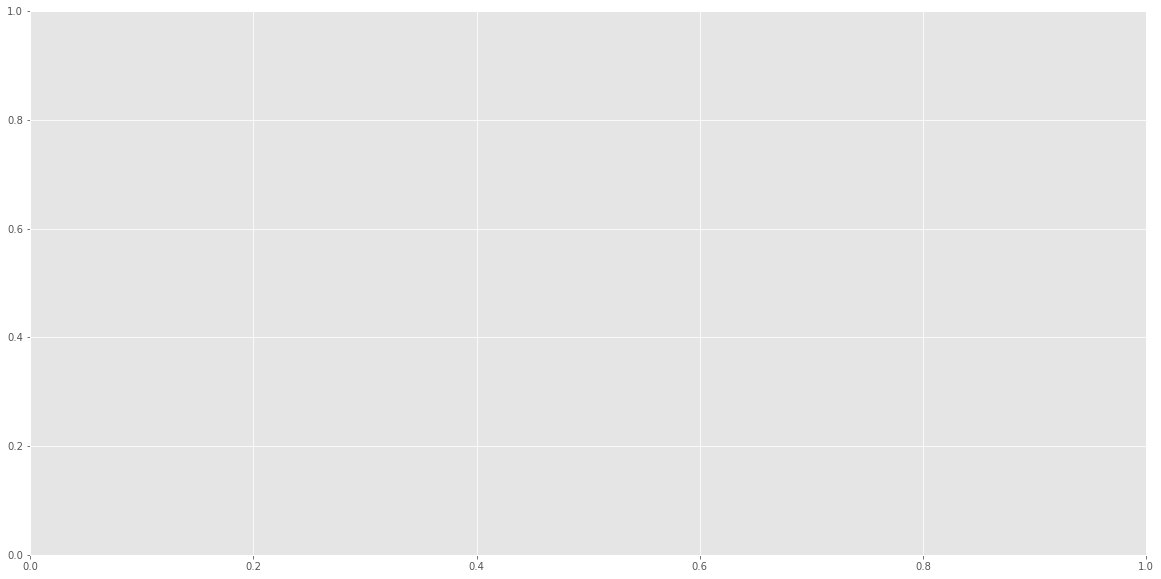

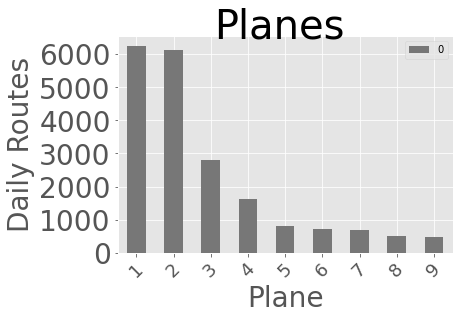

In [55]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20,10))

equipment_list.plot(kind='bar',color=['C10','C11','C12','C13','C14','C15','C21','C22','C23','C24'])

plt.xlabel('Plane',fontsize=28)
plt.ylabel('Daily Routes',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=28)
plt.suptitle('Planes',fontsize=40)
plt.show()



## Exploratory data analysis

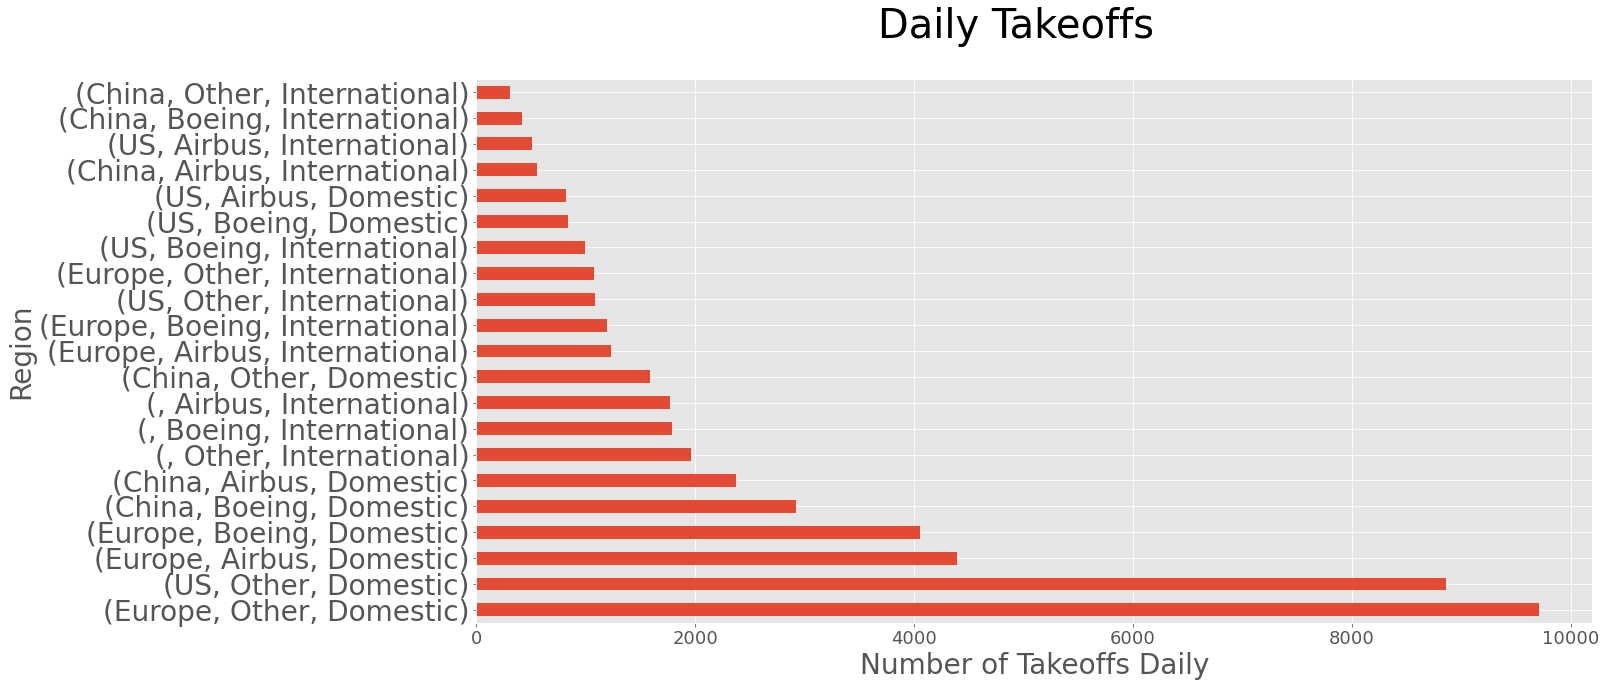

In [56]:
fig, ax = plt.subplots(figsize=(20,10))

df_final[['Source Entity','Equipment Type','Travel Type']].value_counts().plot(kind='barh')
plt.xlabel('Number of Takeoffs Daily',fontsize=28)
plt.ylabel('Region',fontsize=28)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('Daily Takeoffs',fontsize=40)
plt.show()



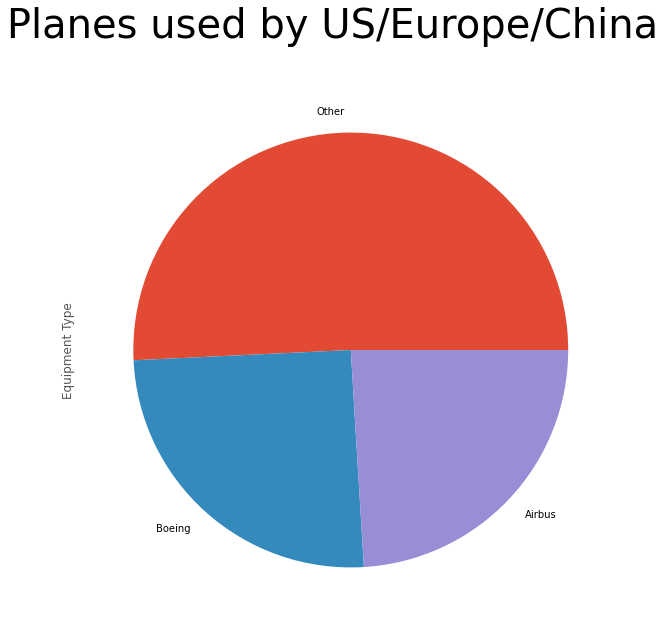

In [57]:
fig, ax = plt.subplots(figsize=(20,10))

df_final['Equipment Type'].value_counts().plot(kind='pie')

plt.rcParams['font.size'] =20
plt.suptitle('Planes used by US/Europe/China',fontsize=40)
plt.show()

In [58]:
df1=df_final[['Destination Entity','Equipment Type']].value_counts().reset_index()

In [59]:
df1

,Destination Entity,Equipment Type,0
0,Europe,Other,10773
1,US,Other,9943
2,Europe,Airbus,5637
3,Europe,Boeing,5254
4,China,Boeing,3342
5,China,Airbus,2918
6,,Other,1975
7,China,Other,1899
8,US,Boeing,1839
9,,Boeing,1777


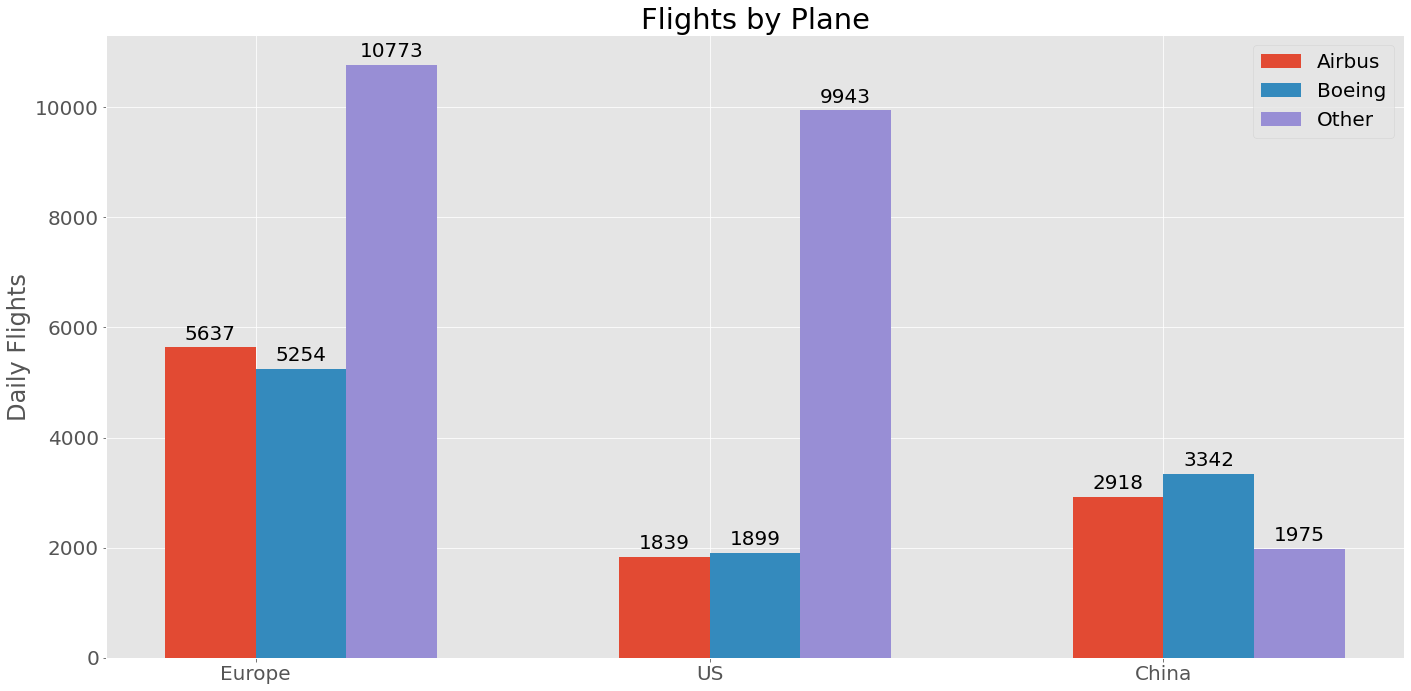

In [60]:

labels = [df1['Destination Entity'][0],df1['Destination Entity'][1],df1['Destination Entity'][4]]
airbus = [df1[0][2],df1[0][8],df1[0][5]]
boeing = [df1[0][3],df1[0][7],df1[0][4]]
other  = [df1[0][0],df1[0][1],df1[0][6]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, airbus, width, label='Airbus')
rects2 = ax.bar(x + width/2, boeing, width, label='Boeing')
rects3 = ax.bar(x + 3* (width/2), other, width, label='Other')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Daily Flights')
ax.set_title('Flights by Plane')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() /2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

plt.show()


In [61]:
df2=df_final[['Destination Entity','Travel Type']].value_counts().reset_index()

In [62]:
df2

,Destination Entity,Travel Type,0
0,Europe,Domestic,18153
1,US,Domestic,10521
2,China,Domestic,6877
3,,International,5524
4,Europe,International,3511
5,US,International,2581
6,China,International,1282


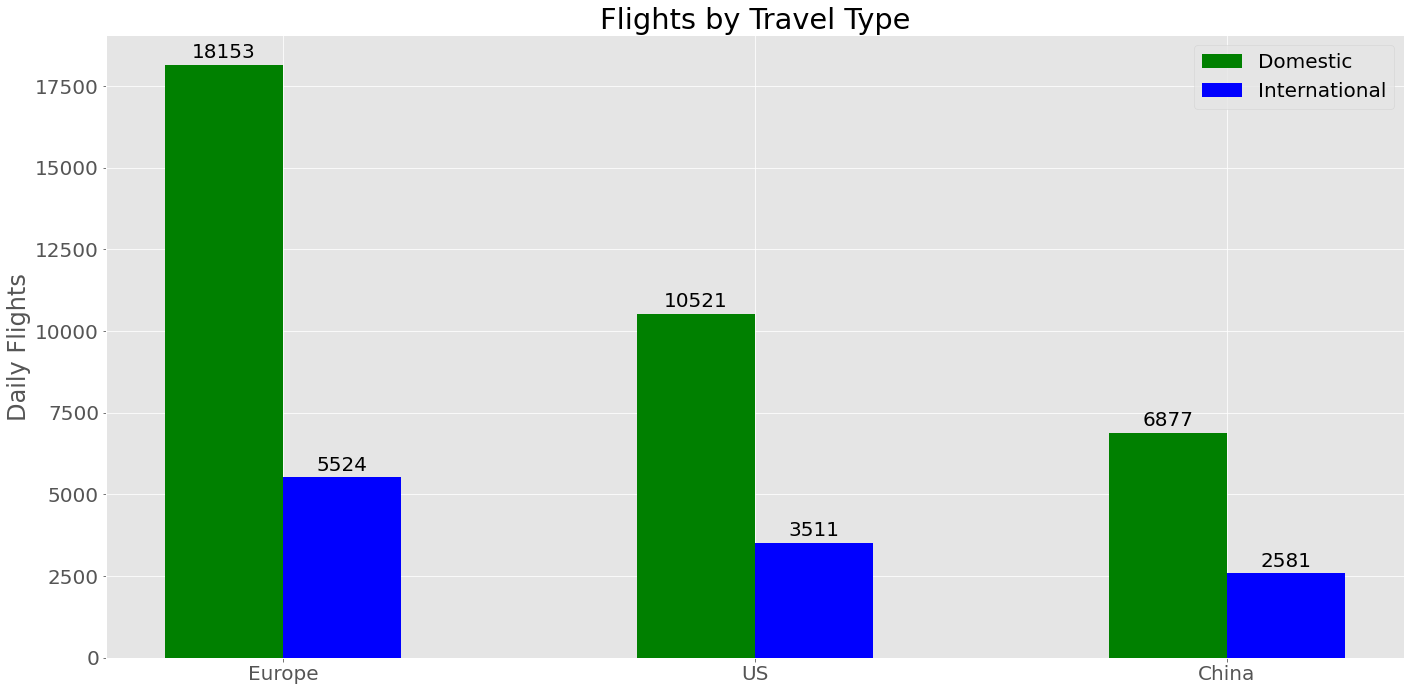

In [63]:
labels = [df2['Destination Entity'][0],df2['Destination Entity'][1],df2['Destination Entity'][2]]
domestic = [df2[0][0],df2[0][1],df2[0][2]]
intl = [df2[0][3],df2[0][4],df2[0][5]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, domestic, width, label='Domestic',color='g')
rects2 = ax.bar(x + width/2, intl, width, label='International',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Daily Flights')
ax.set_title('Flights by Travel Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### Hypothesis Testing

𝐻0 : The average rate of Boeing planes on the US domestic routes is same as the average rate of Boeing planes on European domestic routes.

𝐻𝑎 : The average rate of Boeing planes on the US domestic routes is not the same as the average rate of Boeing planes on European domestic routes.

In [64]:
def planes_ttest(ttype, etype, stype_1, stype_2):
    
    # take 30 % sample form population
    
    df_sample=df_final.sample(frac=0.25, random_state=1)
    
    df_sample.loc[(df_sample['Equipment Type'] == etype) & (df_sample['Source Entity'] == stype_1) & (df_sample['Travel Type'] == ttype), 'field1'] = 1  
    df_sample.loc[(df_sample['Equipment Type'] == etype) & (df_sample['Source Entity'] == stype_2) & (df_sample['Travel Type'] == ttype), 'field1'] = 1  
    df_sample.fillna(value={'field1':0},inplace=True)
    sample1 = df_sample['field1'][(df_sample['Source Entity'] == stype_1) & (df_sample['Travel Type'] == ttype)].reset_index()
    sample2 = df_sample['field1'][(df_sample['Source Entity'] == stype_2) & (df_sample['Travel Type'] == ttype)].reset_index()

    # Check Welch's t-test
    
    t,p = stats.ttest_ind(sample1,sample2,equal_var = False)
    
    return f'p-value for {etype} on {ttype} flights between {stype_1} and {stype_2} is {p[0]}'

In [65]:
df_final[['Travel Type','Source Entity','Equipment Type']].groupby(['Travel Type','Source Entity','Equipment Type']).size().reset_index(name='Equipment')

,Travel Type,Source Entity,Equipment Type,Equipment
0,Domestic,China,Airbus,2368
1,Domestic,China,Boeing,2922
2,Domestic,China,Other,1587
3,Domestic,Europe,Airbus,4392
4,Domestic,Europe,Boeing,4051
5,Domestic,Europe,Other,9710
6,Domestic,US,Airbus,820
7,Domestic,US,Boeing,841
8,Domestic,US,Other,8860
9,International,,Airbus,1772


In [66]:
planes_ttest('Domestic', 'Boeing', 'Europe', 'US')

'p-value for Boeing on Domestic flights between Europe and US is 0.003110419863049442'

In [67]:
planes_ttest('International', 'Boeing', 'Europe', 'US')

'p-value for Boeing on International flights between Europe and US is 0.0002573656072671127'

In [68]:
planes_ttest('Domestic', 'Airbus', 'Europe', 'China')

'p-value for Airbus on Domestic flights between Europe and China is 8.290955486440001e-16'

In [69]:
df_final['Source Entity'].value_counts()

Europe    21658
US        13109
China      8160
           5522
Name: Source Entity, dtype: int64

In [70]:
planes_ttest('International','Airbus','Europe','China')

'p-value for Airbus on International flights between Europe and China is 4.649046140600722e-06'

In [71]:
df_final[~df_final['Source Entity'].isin(['Europe','China','US'])]

,Airline,Airline ID,Source airport,Source airport ID,Source Name,Source City,Source Country,Destination airport,Destination airport ID,Destination Name,Destination City,Destination Country,Equipment,Equipment Name,Destination Entity,Source Entity,Equipment Type,Travel Type
121,2L,2750,RMF,4197,Marsa Alam International Airport,Marsa Alam,Egypt,ZRH,1678,Zürich Airport,Zurich,Switzerland,319,Airbus A319,Europe,,Airbus,International
271,3F,16262,CGA,7144,NaN,,,KTN,3808,Ketchikan International Airport,Ketchikan,United States,DHP,De Havilland Canada DHC-2 Beaver,US,,Other,International
274,3F,16262,HYL,7145,NaN,,,KTN,3808,Ketchikan International Airport,Ketchikan,United States,DHP,De Havilland Canada DHC-2 Beaver,US,,Other,International
276,3F,16262,KTB,7147,NaN,,,KTN,3808,Ketchikan International Airport,Ketchikan,United States,DHP,De Havilland Canada DHC-2 Beaver,US,,Other,International
286,3G,595,BJL,1050,Banjul International Airport,Banjul,Gambia,BCN,1218,Barcelona International Airport,Barcelona,Spain,319,Airbus A319,Europe,,Airbus,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67633,ZK,2607,EAR,6129,NaN,,,DEN,3751,Denver International Airport,Denver,United States,EM2,Embraer EMB 120 Brasilia,US,,Other,International
67638,ZK,2607,IGM,6132,NaN,,,LAX,3484,Los Angeles International Airport,Los Angeles,United States,BE1,,US,,Other,International
67639,ZK,2607,IGM,6132,NaN,,,PGA,4124,Page Municipal Airport,Page,United States,BE1,,US,,Other,International
67664,ZK,2607,SVC,6135,NaN,,,PHX,3462,Phoenix Sky Harbor International Airport,Phoenix,United States,BE1,,US,,Other,International
